# lab4
Метод Монте-Карло

## tasks
1. По методу Монте-Карло вычислить приближенное значения интегралов.
2. Сравнить полученное значение либо с точным значением (если его получится вычислить), либо с приближенным, полученным в каком-либо математическом пакете (например, в `Mathematica`). Для этого построить график зависимости точности вычисленного методом Монте-Карло интеграла от числа итераций `n`.

## integrals
# 1. $\int\limits_{-\infty}^{\infty} e^{-x^4} \sqrt{1+x^4} dx$
# 2. $\iint\limits_{1 \leq x^2 + y^2 \leq 4} \dfrac{dx dy}{x^2 + y^4}$

## solution

In [107]:
import sys

import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from scipy.stats import cauchy
from math import e, pow, sqrt
from random import uniform

### Определим подинтегральные функции и вычислим приближенные значения интегралов:

In [2]:
def integrand_1(x):
    return e**(-x**4) * (1 + x**4)**0.5

i1 = integrate.quad(integrand_1, -np.inf, np.inf)[0]
i1

2.0000486836450677

### Для подсчёта второго интеграла разобём его на несколько:

## $
\iint\limits_{1 \leq x^2 + y^2 \leq 4} = \int\limits_{-2}^2\int\limits_{(-\sqrt{4-x^2})}^{\sqrt{4-x^2}} - \int\limits_{-1}^1\int\limits_{(-\sqrt{1-x^2})}^{\sqrt{1-x^2}} = \left(\int\limits_{-2}^{-0}\int\limits_{(-\sqrt{4-x^2})}^{\sqrt{4-x^2}} + \int\limits_{+0}^2\int\limits_{(-\sqrt{4-x^2})}^{\sqrt{4-x^2}}\right) - \left(\int\limits_{-1}^{-0}\int\limits_{(-\sqrt{1-x^2})}^{\sqrt{1-x^2}} + \int\limits_{+0}^1\int\limits_{(-\sqrt{1-x^2})}^{\sqrt{1-x^2}}\right)
$

In [35]:
epsilon = 0.006

def integrand_2(x, y):
    return 1.0  / (x**2 + y**4)

def get_x(frm, to):
    return lambda: [frm, to]

def get_y(to):
    def bounds_y(x):
        y = (to - x**2)**0.5
        return [-y, y]
    return bounds_y
    
ig1 = integrate.nquad(integrand_2, [get_y(4), get_x(-2, -epsilon)])[0]
ig2 = integrate.nquad(integrand_2, [get_y(4), get_x(epsilon, 2)])[0]
ig3 = integrate.nquad(integrand_2, [get_y(1), get_x(-1, -epsilon)])[0]
ig4 = integrate.nquad(integrand_2, [get_y(1), get_x(epsilon, 1)])[0]
i2 = ig1 + ig2 - (ig3 + ig4)
i2

3.845981334977523

### Определим функцию вычисления интеграла по методу Монте-Карло:

In [4]:
def calculate_integral(integrand, values, distr):
    return sum([integrand(el) / distr(el) for el in values]) / len(values)

In [13]:
def calculate_first(n=1000):
    return calculate_integral(integrand_1, cauchy.rvs(size=n), cauchy.pdf)
calculate_first()

2.0062522348319711

### Для второго интеграла, ограничим область интегрирования квадратом `4x4`:

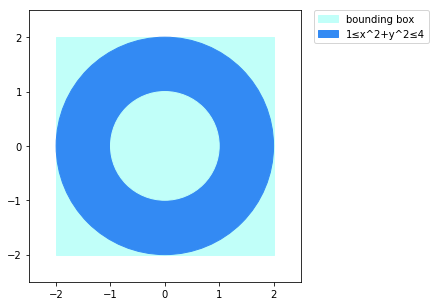

In [180]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, aspect='equal')
square = plt.Rectangle((-2, -2), 4, 4, color='#C1FFF9', label='bounding box')
circle1 = plt.Circle((0, 0), 2, color='#338AF3', label='1≤x^2+y^2≤4')
circle2 = plt.Circle((0, 0), 1, color='#C1FFF9')
ax.add_patch(square)
ax.add_patch(circle1)
ax.add_patch(circle2)
plt.axis([-2.5, 2.5, -2.5, 2.5])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Определим функцию-индикатор попадания в область интегрирования:

In [24]:
def region(x, y):
    return 1 <= x**2 + y**2 <=4

def second_f(args):
    return integrand_2(*args) if region(*args) else 0

In [78]:
def uniform_pdf(x):
    return 0.25 if -2 <= x <= 2 else 0 

def distr(args):
    x, y = args
    return uniform_pdf(x) * uniform_pdf(y)

def calculate_second(n=1000):
    x = [uniform(-2, 2) for _ in range(n)]
    y = [uniform(-2, 2) for _ in range(n)]
    return calculate_integral(second_f, list(zip(x, y)), distr)
calculate_second()

3.8357245973803944

### Проеведем серии экспериментов и построим графики:

In [103]:
m = 10

def get_numbers():
    return (2**x for x in range(0, 16))

def test(func):
    return [sum([func(n) for _ in range(m)]) / m for n in get_numbers()]

i1_real = test(calculate_first)
i2_real = test(calculate_second)

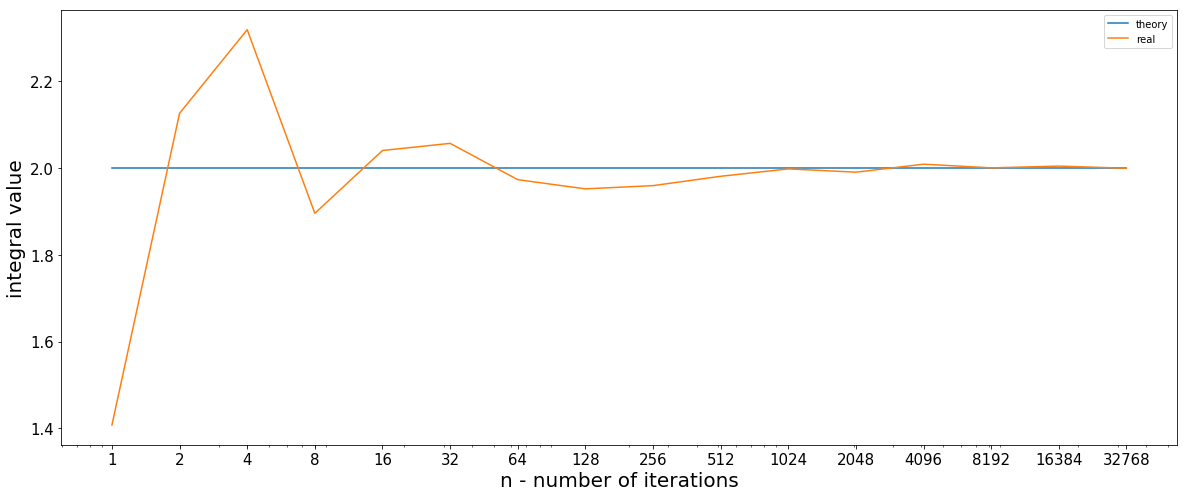

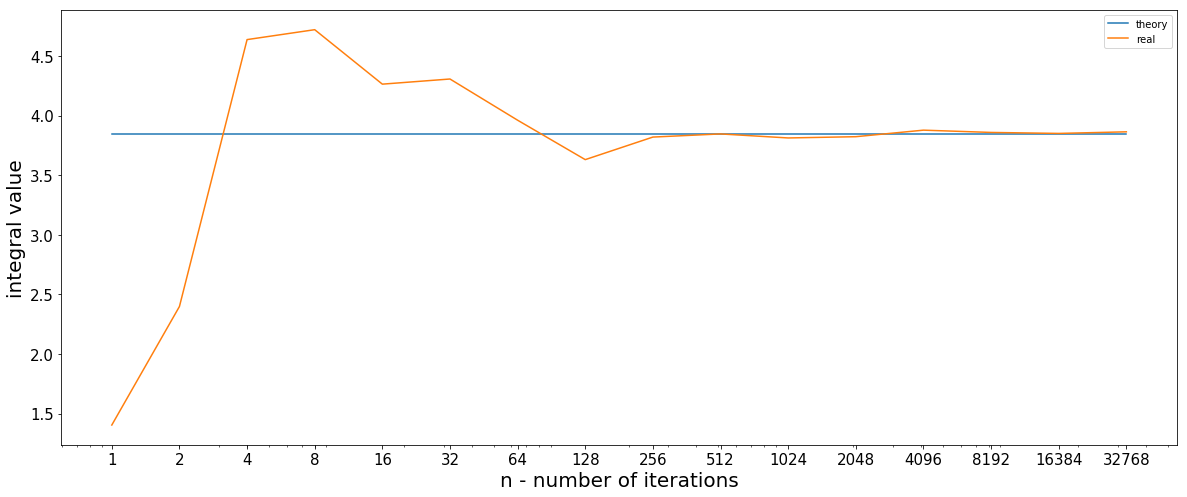

In [194]:
import matplotlib

def draw(real, theory):
    matplotlib.rc('ytick', labelsize=15) 
    matplotlib.rc('xtick', labelsize=15) 
    plt.figure(figsize=(20, 8))
    x = list(get_numbers())
    plt.plot(x, [theory]*len(x), label='theory')
    plt.plot(x, real, label='real')
    plt.xscale('log')
    plt.xticks(x, x)
    plt.xlabel('n - number of iterations', fontsize=20)
    plt.ylabel('integral value', fontsize=20)
    plt.legend()
    plt.show()
    
draw(i1_real, i1)
draw(i2_real, i2)